## Import Libraries and Data

In [3]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2003-0204-23.csv', firstRow=246, lastRow=252)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_310323_S247-252.csv',t_baseline=30,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [4]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=82s and ended at t=488s; mass=44.17095g
This equals a volume of 44.259m; expected was 44.255mL; error is 0.009%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


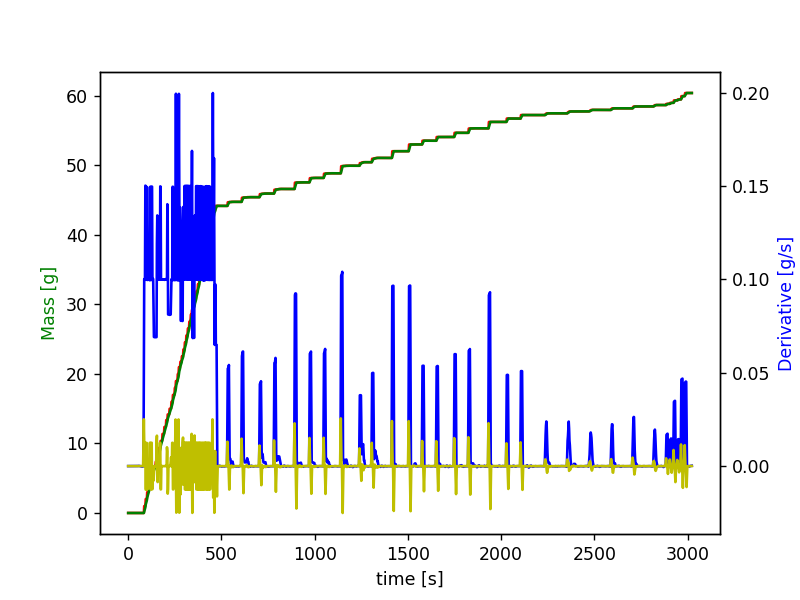

Addition of 0.584g Plantapon ACG 50 detected from 528s to 568s - expected volume = 0.526mL and actual volume = 0.52mL (resulting error is 1.134%)
Addition of 0.677g Plantapon ACG 50 detected from 604s to 652s - expected volume = 0.526mL and actual volume = 0.603mL (resulting error is 14.535%)
Addition of 0.525g Plantacare 2000 detected from 700s to 744s - expected volume = 0.582mL and actual volume = 0.483mL (resulting error is 16.933%)
Addition of 0.662g Plantacare 2000 detected from 778s to 824s - expected volume = 0.582mL and actual volume = 0.609mL (resulting error is 4.632%)
Addition of 0.956g Dehyton MC detected from 888s to 934s - expected volume = 0.933mL and actual volume = 0.879mL (resulting error is 5.813%)
Addition of 0.641g Dehyton MC detected from 968s to 1004s - expected volume = 0.554mL and actual volume = 0.594mL (resulting error is 7.157%)
Addition of 0.668g Dehyton MC detected from 1044s to 1084s - expected volume = 0.554mL and actual volume = 0.619mL (resulting erro

In [5]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


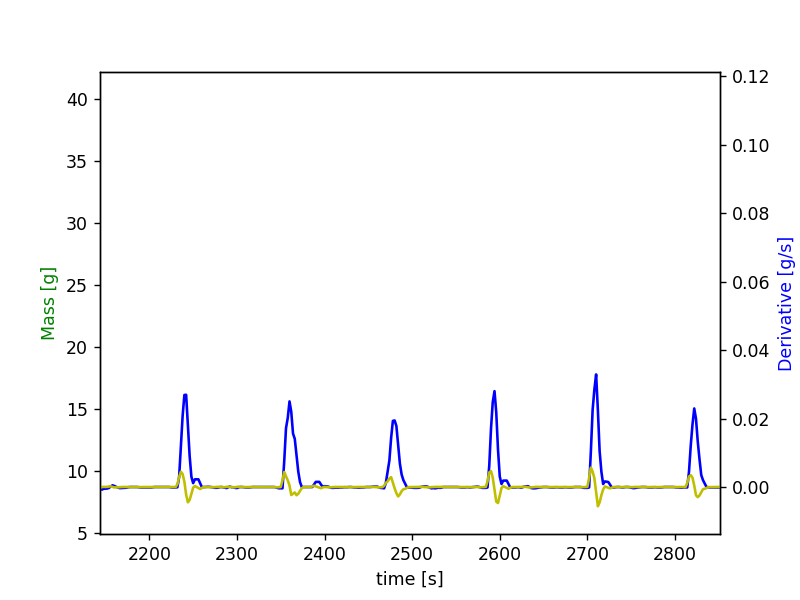

Addition of 0.256g Luviquat Excellence detected from 2230s to 2264s - expected volume = 0.265mL and actual volume = 0.232mL (resulting error is 12.286%)
Addition of 0.284g Luviquat Excellence detected from 2350s to 2400s - expected volume = 0.255mL and actual volume = 0.254mL (resulting error is 0.656%)
Addition of 0.218g Luviquat Excellence detected from 2466s to 2498s - expected volume = 0.197mL and actual volume = 0.196mL (resulting error is 0.628%)
Addition of 0.236g Luviquat Excellence detected from 2584s to 2616s - expected volume = 0.215mL and actual volume = 0.215mL (resulting error is 0.053%)
Addition of 0.274g Luviquat Excellence detected from 2700s to 2730s - expected volume = 0.251mL and actual volume = 0.25mL (resulting error is 0.409%)
Addition of 0.21g Luviquat Excellence detected from 2812s to 2840s - expected volume = 0.188mL and actual volume = 0.189mL (resulting error is 0.962%)


In [11]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

In [ ]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_310323_S241-S246.csv', index=False)
actualMassFractions